## Assignment for Topic 5: Support Vector Machine

Hi,there! This assignment is created by @Xingjian and checked by Professor @Jiahui and @Chunmei.

### Another Edition 
This is an edition for jupyter notebook. About .py edition, please see attachment in this folder.

### DataSets
About DataSets, we will use simple dataset for classification. In this dataset, we do not neccessarily use normalization method in _sklearn.processing_ to handle this. So let us see the following:

In [1]:
import numpy as np
X = np.array([[-2,4],[4,1],[1,6],[2,4],[6,2],])
Y = np.array([-1,-1,1,1,1])
X_test = np.array([[2,2],[4,3],[5,5],[1,3],[3,4],[-2,5]])
y_test = np.array([-1,1,1,-1,1,-1]).reshape(X_test.shape[0],1)

We can put this dataset in the graph. In graph, orange points mean the test dataset, and red points and blue points represent the training dataset.

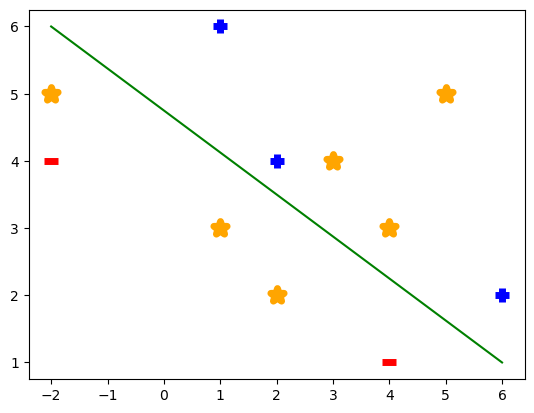

In [2]:
import matplotlib.pyplot as plt
def data_first_plot(X,X_test,Y):
    for i in range(X_test.shape[0]):
        plt.scatter(X_test[i][0],X_test[i][1],s=100,marker='*',color='orange',linewidth=5)
    
    for val,inp in enumerate(X):
        if Y[val]== 1:
            plt.scatter(inp[0],inp[1],s=100,marker='+',color='blue',linewidth=5)
        else:
            plt.scatter(inp[0],inp[1],s=100,marker='_',color='red',linewidth=5)
    plt.plot([-2,6],[6,1],color='green')
data_first_plot(X,X_test,Y)

### Realization of SVM(Support Vector Machine)
Then we need to deduce the result for SVM. Let us deduce it step by step.
First, we need to asscretain and maxmize the geometric interval $\frac{1}{||\omega||}$,(where we denote $\omega$ is the weight and $b$ is a bias). Then this is equivalent to the following formula:
$$\min_{\omega,b} \frac{1}{2}||\omega||^{2}$$

For maxmize $\frac{1}{||\omega||}$, we have a strategy that it is a fixed interval (for example, it is fixed to 1, why is it 1 instead of other numbers? I will talk about it later), looking for the smallest $||\omega||$

Then we can asscertain a classifier, for all real number, we have
$$\omega^{T}x+b>1 ,y_{i}=1 ; \omega^{T}x+b<-1 ,y_{i}=-1$$

Then optimization problem can be written as:
$$arg\max_{\omega,b}\left\{\min_{i}(y_{i}\cdot(\omega^{T}x_{i}+b))\cdot\frac{1}{||\omega||}\right\}$$

Obviously,
$$y_{i}\cdot(\omega^{T}x_{i}+b)\ge 1 ,y_{i}=1$$.

We can combine two conditions, then optimization problem can be done as following:
$$\begin{cases}\min_{\omega,b}\frac{1}{2}||\omega||^{2}\\
s.t. y_{i}\cdot(\omega^{T}x_{i}+b)\ge 1 ,{i}=1,2,...,m.
\end{cases}$$

Then we can use Langrange method to get the following formula:
$$L(\omega,b,\lambda)= \frac{1}{2}||\omega||^{2}-\sum_{i=1}^{m}\(lambda_{i}[y_{i}\cdot(\omega^{T}x_{i}+b)]-1)$$

Then we can solve it by dual problem:
$$d^{*} = ,\max_{\lambda_{i}}\min_{\omega}L(\omega,b,\lambda)$$
and fix $\lambda_{i}$ ,we can compute the derivative:
$$\begin{cases}
\frac{\partial L}{\partial \omega} = \omega-\sum_{i=1}^{m}\lambda_{i}y^{i}x^{i}=0\\
\frac{\partial L}{\partial b} = \sum_{i=1}^{m}\lambda_{i}y^{i}=0
\end{cases}$$

And more details, please see [https://zhuanlan.zhihu.com/p/270298485] in Chinese edition.

#### Why should the minimum distance be fixed at 1?

If we directly solve this minimum problem, it is easy to see that when $||\omega||=0$ , the minimum value of the objective function is obtained. But you will also find that no matter what kind of data you give, it is the solution! And that causes all samples can not be classfied!

The reason for this result is that only the goal is considered when describing the problem, and no constraints are added. The constraints are the conditions that must be met during the solution process.
  
### Coding:

We can write a class as following,it is followed by the afortmented writing:


In [3]:
class SVM():
    def __init__(self,X,y,lr=0.01,lmd=0.01,epoch=2000):
        self.X = X
        self.y = y
        self.M = X.shape[0]
        self.N = X.shape[1]
        self.P = y.shape[0]
        self.W = np.random.rand(self.N,1)
        self.b = np.zeros((1,1))
        self.lr = lr
        self.lmd = lmd
        self.epoch = epoch
    
    def fit(self):
        print("M:{},N:{},P:{}".format(self.M,self.N,self.P))
        y = self.y.reshape([self.P,1])
        for _ in range(self.epoch):
            # calculate the predicted values
            y_pred = np.dot(self.X,self.W)+self.b
            #print(y_pred)
            # # calculate the derivative
            part1 = np.zeros((self.N,1))
            part2 = np.zeros((1,1))
            for i in range(self.P):
                part2 += (self.lmd*y[i])
                if (self.y[i]*y_pred[i] < 1):
                    part1 += -(self.lmd*self.y[i]*self.X[i]).reshape(self.N,1)
                else:
                    part1 += 0
                
            dW = 2*self.W+part1
            db = part2
            self.W -=self.lr*dW
            self.b -=self.lr*db
     
    def predict(self, X_test):
        ypred = np.dot(X_test, self.W) + self.b
        return np.sign(ypred)

Then we can test it by using the dataset:

M:5,N:2,P:5
1.0


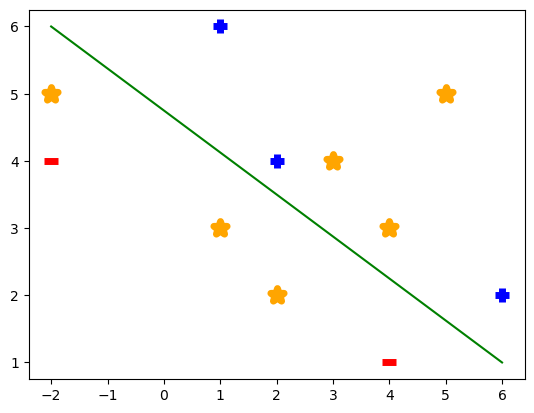

In [6]:
np.random.seed(123)
def accuracy(ypred, yexact):
    p = np.array(ypred==yexact, dtype=int)
    return np.sum(p)/float(len(yexact))
data_first_plot(X,X_test,Y)   
model = SVM(X,Y)
model.fit()
y_pred = model.predict(X)
y_pred_test = model.predict(X_test)
y_test = np.array([-1,1,1,-1,1,-1]).reshape(y_pred_test.shape[0],1)
print(accuracy(y_pred_test, y_test))